In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
#Load the clean data sample from phase 1
df = pd.read_csv('https://raw.githubusercontent.com/INFO590-Pythoneers/Final-Project-Repo/master/Phase%202/Data/BreastCancerWisconsinUpdate.csv')
print(df.head())

       Scn  A2  A3  A4  A5  A6    A7  A8  A9  A10  CLASS
0  1000025   5   1   1   1   2   1.0   3   1    1      2
1  1002945   5   4   4   5   7  10.0   3   2    1      2
2  1015425   3   1   1   1   2   2.0   3   1    1      2
3  1016277   6   8   8   1   3   4.0   3   7    1      2
4  1017023   4   1   1   3   2   1.0   3   1    1      2


### Evaluate the optimal number of clusters

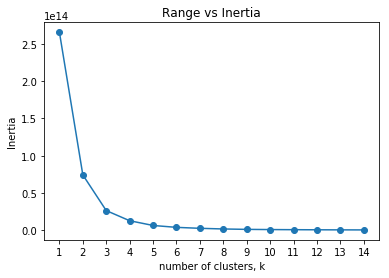

In [5]:
# make a range from 1 to 15
ks = range(1, 15)

# create an empty list
inertias = []

# for loop to calculate KMeans for each values 
for k in ks:
    model =KMeans(n_clusters=k) 
    model.fit(df)    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot Range vs Inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('Inertia')
plt.title('Range vs Inertia')
plt.xticks(ks)
plt.show()

##### The optimal number of clusters is determined when inertia begins to decrease at a slower pace, also known as the "elbow" in the inertia plot. In our data sample above the optimal number of clusters is three.  